In [28]:
# ! pip install pyLDAvis
! pip install konlpy
import konlpy
from konlpy.tag import Kkma
from konlpy.utils import pprint
from google.colab import drive
import pandas as pd
import numpy as np

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
data = pd.read_csv('/content/drive/Shareddrives/ü•ëPSAT_DM_2728ü•ë/Dataset/Í∏∞ÏÇ¨ÌÅ¨Î°§ÎßÅ_TFIDF/IT&Í∏∞Ïà†_20211024_TFIDF.csv', encoding = 'utf-8')

In [30]:
data

title  ...                                    important_words
0     OTT Ïù¥Ïñ¥ Î∞©ÏÜ°ÏÇ¨ÎèÑ ÎÅùÏóÜÎäî ÏùåÏïÖ ÏÇ¨Ïö©Î£å Í∞àÎì± Ï∞®ÎØºÏòÅÏùò Ìè¨Ïä§Ìä∏IT   ...  [Index(['pp', 'Í≥ÑÏïΩ', 'Í≥†ÎØº', 'Í¥ÄÎ¶¨', 'Í∑úÏ†ï', 'Í∏∞Ïó¨', 'ÎÖº...
1       ÎÇòÎ°úÌò∏ ÎïåÎèÑ 5Í∞úÏõî  ÎàÑÎ¶¨Ìò∏ Ïã§Ìå® ÏõêÏù∏ Í∏àÎ∞© Ïïà ÎÇòÏò§Îäî Ïù¥Ïú†Îäî   ...  [Index(['kslv', 'Í≤ÄÏ¶ù', 'Í≤∞Í≥º', 'Í≥µÍ∏â', 'Í≥ºÏ†ï', 'Í≥ºÌïôÍ∏∞Ïà†'...
2    Ï†ïÏùòÏÑ† ÌöåÏû•  Ïù∏ÎèÑÎÑ§ÏãúÏïÑ ÎèÑÏ∞© Ï°∞ÏΩîÏúÑ ÎåÄÌÜµÎ†πÍ≥º Ï†ÑÍ∏∞Ï∞® ÌòëÎ†• ÎÖºÏùòÌï† ÎìØ  ...  [Index(['Í≥µÎûµ', 'Í≥µÏû•', 'Í∑∏Î£π', 'ÎåÄÌÜµÎ†π', 'ÎêòÎ©∞', 'ÎßûÏ∂∞', '...
3                KIST  ÌôçÎ¶âÍ∞ïÏÜåÌäπÍµ¨ Î∞îÏù¥Ïò§Ï∞ΩÏóÖÎ©îÏπ¥Î°ú ÌÇ§Ïö¥Îã§   ...  [Index(['Í∏∞Í¥Ä', 'Í∏∞ÎÖê', 'Í∏∞Ïà†', 'Í∏∞ÏóÖ', 'ÎÖ∏Î†•', 'ÎåÄÏÉÅ', 'ÎåÄ...
4       3Î∂ÑÍ∏∞ Í≥µÎ™®Ï£º Ïó¥Í∏∞ Í∞ÄÏÉÅÌôîÌèê Î∞òÎì±  Î∂àÎ≤ï Ïä§Ìå∏ ÎèÑ 700ÎßåÍ±¥    ...  [Index(['Í∞ÄÏÉÅ', 'Í±¥Ïàò', 'Í≤∞Í≥º', 'Í¥ÄÏã¨', 'Í∂åÏú†', 'Í∏àÏúµ', 'ÎåÄ...
..                                      ...  ...                                                ...
339        DD Ìá¥Í∑ºÍ∏∏   Í±∞Ïùò ÏÑ±Í≥µÌñàÎäîÎç∞  ÎàÑÎ¶¨Ìò∏  ÏïÑÏâΩÏßÄÎßå Ïû•ÌïòÎã§  ...  [Index(['lg', 'oled', 'Í∞ÄÎä•ÏÑ±', 'Í≤åÏûÑ', 'Í≥ÑÌöç', 'Í≥µÍ∏â',...
340     ÏÑ∏ÏùºÏ¶àÌè¨Ïä§Í∞Ä  ÏúÑÎìú ÏΩîÎ°úÎÇò Î•º ÏßÄÏõêÌïòÎäî Î∞©Î≤ï   Î∞±Ïã† ÌÅ¥ÎùºÏö∞Îìú   ...  [Index(['Í∞úÎ∞ú', 'Í¥ÄÎ¶¨', 'Í∏∞Í¥Ä', 'Í∏∞ÏóÖ', 'Îã®Í≥Ñ', 'Îî∞Î•∏', 'Î∞±...
341    ITÎèãÎ≥¥Í∏∞  Ìï¥Ïô∏ ÌÅ¥ÎùºÏö∞Îìú Í∏∞ÏóÖ  ÌïúÍµ≠ÎïÖÏóê Îç∞Ïù¥ÌÑ∞ÏÑºÌÑ∞ Ïò¨Î¶∞Îã§ Ïôú   ...  [Index(['Í≥ÑÌöç', 'Í≥†Í∞ù', 'Í≥µÎûµ', 'Íµ¨Ï∂ï', 'Í∑∏Î£π', 'Í∏ÄÎ°úÎ≤å', '...
342         Ïï±  ÏÜåÎ¨∏  ÌÜµÌï¥ Íµ≠ÏÇ∞SW Í≥µÍ≥µÏãúÏû•ÏÑú Îçî ÎßéÏù¥ Ïú†ÌÜµÎêòÍ≤å   ...  [Index(['sw', 'Í∏ÄÎ°úÎ≤å', 'ÎåÄÏ†Ñ', 'Î™ÖÌíà', 'Î∞úÏ£º', 'Î∂ÄÎ¨∏', '...
343                   ÌïúÏª¥  Í∞úÎ∞©Ìòï Í∞úÎ∞úÏûê ÏÉùÌÉúÍ≥Ñ Íµ¨Ï∂ïÌïúÎã§   ...  [Index(['Í∞úÎ∞ú', 'Í∞úÎ∞úÏûê', 'Í∞úÎ∞©', 'Í≥†ÎØº', 'Í≥µÍ∞ú', 'Íµ¨Ï∂ï', '...

[344 rows x 10 columns]

In [31]:
def slice(temp):
  index1=temp.find('[', 1)
  index2 = temp.find(']', 0)
  return temp[index1:(index2+1)]

data['important_words'] = data['important_words'].apply(slice)
data['important_words'] = data['important_words'].apply(lambda k: eval(''.join(k)))

In [32]:
data["important_words"]

0      [pp, Í≥ÑÏïΩ, Í≥†ÎØº, Í¥ÄÎ¶¨, Í∑úÏ†ï, Í∏∞Ïó¨, ÎÖºÎûÄ, Îã®Ï≤¥, ÎêòÏßÄ, ÎëêÍ≥†, Î∞©ÏÜ°, Î∂Ä...
1      [kslv, Í≤ÄÏ¶ù, Í≤∞Í≥º, Í≥µÍ∏â, Í≥ºÏ†ï, Í≥ºÌïôÍ∏∞Ïà†, Íµ¨ÏßÑ, Í∑∏ÎûòÌîΩ, Í∏∞Ïà†, ÎÇòÎ°ú, ...
2      [Í≥µÎûµ, Í≥µÏû•, Í∑∏Î£π, ÎåÄÌÜµÎ†π, ÎêòÎ©∞, ÎßûÏ∂∞, ÎØ∏Íµ≠, Î∞∞ÌÑ∞Î¶¨, Î≥¥Ïú†, Î∂ÄÌíà, ÏÇ∞ÏóÖ,...
3      [Í∏∞Í¥Ä, Í∏∞ÎÖê, Í∏∞Ïà†, Í∏∞ÏóÖ, ÎÖ∏Î†•, ÎåÄÏÉÅ, ÎåÄÌöå, ÎèÑÏ†Ñ, ÎùºÏö¥Îìú, ÎßàÎ¨¥Î¶¨, Î∞îÏù¥Ïò§...
4      [Í∞ÄÏÉÅ, Í±¥Ïàò, Í≤∞Í≥º, Í¥ÄÏã¨, Í∂åÏú†, Í∏àÏúµ, ÎåÄÎπÑ, ÎåÄÏ∂ú, ÎèôÍ∏∞, Î™®Ï£º, ÏÉÅÏäπ, Ïàò...
                             ...                        
339    [lg, oled, Í∞ÄÎä•ÏÑ±, Í≤åÏûÑ, Í≥ÑÌöç, Í≥µÍ∏â, Í∂§ÎèÑ, ÎÑ§Ìä∏ÏõåÌÅ¨, ÎàÑÎ¶¨, ÎåÄÏÉÅ, ...
340    [Í∞úÎ∞ú, Í¥ÄÎ¶¨, Í∏∞Í¥Ä, Í∏∞ÏóÖ, Îã®Í≥Ñ, Îî∞Î•∏, Î∞±Ïã†, ÏÇ¨ÌÉú, ÏàòÌñâ, ÏãúÎåÄ, ÏïàÏ†Ñ, Ïó≠...
341    [Í≥ÑÌöç, Í≥†Í∞ù, Í≥µÎûµ, Íµ¨Ï∂ï, Í∑∏Î£π, Í∏ÄÎ°úÎ≤å, Í∏∞Ïà†, Í∏∞ÏóÖ, ÎÑ§Ìä∏ÏõåÌÅ¨, ÎÜíÏù¥Í∏∞, ÎåÄ...
342    [sw, Í∏ÄÎ°úÎ≤å, ÎåÄÏ†Ñ, Î™ÖÌíà, Î∞úÏ£º, Î∂ÄÎ¨∏, ÏÇ∞ÏóÖ, ÏÉÅÏö©, Ï†ïÎ≥¥, Ï†ïÏ±Ö, Ï†ïÌÜµÎ∂Ä,...
343    [Í∞úÎ∞ú, Í∞úÎ∞úÏû

In [33]:
data

title  ...                                    important_words
0     OTT Ïù¥Ïñ¥ Î∞©ÏÜ°ÏÇ¨ÎèÑ ÎÅùÏóÜÎäî ÏùåÏïÖ ÏÇ¨Ïö©Î£å Í∞àÎì± Ï∞®ÎØºÏòÅÏùò Ìè¨Ïä§Ìä∏IT   ...  [pp, Í≥ÑÏïΩ, Í≥†ÎØº, Í¥ÄÎ¶¨, Í∑úÏ†ï, Í∏∞Ïó¨, ÎÖºÎûÄ, Îã®Ï≤¥, ÎêòÏßÄ, ÎëêÍ≥†, Î∞©ÏÜ°, Î∂Ä...
1       ÎÇòÎ°úÌò∏ ÎïåÎèÑ 5Í∞úÏõî  ÎàÑÎ¶¨Ìò∏ Ïã§Ìå® ÏõêÏù∏ Í∏àÎ∞© Ïïà ÎÇòÏò§Îäî Ïù¥Ïú†Îäî   ...  [kslv, Í≤ÄÏ¶ù, Í≤∞Í≥º, Í≥µÍ∏â, Í≥ºÏ†ï, Í≥ºÌïôÍ∏∞Ïà†, Íµ¨ÏßÑ, Í∑∏ÎûòÌîΩ, Í∏∞Ïà†, ÎÇòÎ°ú, ...
2    Ï†ïÏùòÏÑ† ÌöåÏû•  Ïù∏ÎèÑÎÑ§ÏãúÏïÑ ÎèÑÏ∞© Ï°∞ÏΩîÏúÑ ÎåÄÌÜµÎ†πÍ≥º Ï†ÑÍ∏∞Ï∞® ÌòëÎ†• ÎÖºÏùòÌï† ÎìØ  ...  [Í≥µÎûµ, Í≥µÏû•, Í∑∏Î£π, ÎåÄÌÜµÎ†π, ÎêòÎ©∞, ÎßûÏ∂∞, ÎØ∏Íµ≠, Î∞∞ÌÑ∞Î¶¨, Î≥¥Ïú†, Î∂ÄÌíà, ÏÇ∞ÏóÖ,...
3                KIST  ÌôçÎ¶âÍ∞ïÏÜåÌäπÍµ¨ Î∞îÏù¥Ïò§Ï∞ΩÏóÖÎ©îÏπ¥Î°ú ÌÇ§Ïö¥Îã§   ...  [Í∏∞Í¥Ä, Í∏∞ÎÖê, Í∏∞Ïà†, Í∏∞ÏóÖ, ÎÖ∏Î†•, ÎåÄÏÉÅ, ÎåÄÌöå, ÎèÑÏ†Ñ, ÎùºÏö¥Îìú, ÎßàÎ¨¥Î¶¨, Î∞îÏù¥Ïò§...
4       3Î∂ÑÍ∏∞ Í≥µÎ™®Ï£º Ïó¥Í∏∞ Í∞ÄÏÉÅÌôîÌèê Î∞òÎì±  Î∂àÎ≤ï Ïä§Ìå∏ ÎèÑ 700ÎßåÍ±¥    ...  [Í∞ÄÏÉÅ, Í±¥Ïàò, Í≤∞Í≥º, Í¥ÄÏã¨, Í∂åÏú†, Í∏àÏúµ, ÎåÄÎπÑ, ÎåÄÏ∂ú, ÎèôÍ∏∞, Î™®Ï£º, ÏÉÅÏäπ, Ïàò...
..                                      ...  ...                                                ...
339        DD Ìá¥Í∑ºÍ∏∏   Í±∞Ïùò ÏÑ±Í≥µÌñàÎäîÎç∞  ÎàÑÎ¶¨Ìò∏  ÏïÑÏâΩÏßÄÎßå Ïû•ÌïòÎã§  ...  [lg, oled, Í∞ÄÎä•ÏÑ±, Í≤åÏûÑ, Í≥ÑÌöç, Í≥µÍ∏â, Í∂§ÎèÑ, ÎÑ§Ìä∏ÏõåÌÅ¨, ÎàÑÎ¶¨, ÎåÄÏÉÅ, ...
340     ÏÑ∏ÏùºÏ¶àÌè¨Ïä§Í∞Ä  ÏúÑÎìú ÏΩîÎ°úÎÇò Î•º ÏßÄÏõêÌïòÎäî Î∞©Î≤ï   Î∞±Ïã† ÌÅ¥ÎùºÏö∞Îìú   ...  [Í∞úÎ∞ú, Í¥ÄÎ¶¨, Í∏∞Í¥Ä, Í∏∞ÏóÖ, Îã®Í≥Ñ, Îî∞Î•∏, Î∞±Ïã†, ÏÇ¨ÌÉú, ÏàòÌñâ, ÏãúÎåÄ, ÏïàÏ†Ñ, Ïó≠...
341    ITÎèãÎ≥¥Í∏∞  Ìï¥Ïô∏ ÌÅ¥ÎùºÏö∞Îìú Í∏∞ÏóÖ  ÌïúÍµ≠ÎïÖÏóê Îç∞Ïù¥ÌÑ∞ÏÑºÌÑ∞ Ïò¨Î¶∞Îã§ Ïôú   ...  [Í≥ÑÌöç, Í≥†Í∞ù, Í≥µÎûµ, Íµ¨Ï∂ï, Í∑∏Î£π, Í∏ÄÎ°úÎ≤å, Í∏∞Ïà†, Í∏∞ÏóÖ, ÎÑ§Ìä∏ÏõåÌÅ¨, ÎÜíÏù¥Í∏∞, ÎåÄ...
342         Ïï±  ÏÜåÎ¨∏  ÌÜµÌï¥ Íµ≠ÏÇ∞SW Í≥µÍ≥µÏãúÏû•ÏÑú Îçî ÎßéÏù¥ Ïú†ÌÜµÎêòÍ≤å   ...  [sw, Í∏ÄÎ°úÎ≤å, ÎåÄÏ†Ñ, Î™ÖÌíà, Î∞úÏ£º, Î∂ÄÎ¨∏, ÏÇ∞ÏóÖ, ÏÉÅÏö©, Ï†ïÎ≥¥, Ï†ïÏ±Ö, Ï†ïÌÜµÎ∂Ä,...
343                   ÌïúÏª¥  Í∞úÎ∞©Ìòï Í∞úÎ∞úÏûê ÏÉùÌÉúÍ≥Ñ Íµ¨Ï∂ïÌïúÎã§   ...  [Í∞úÎ∞ú, Í∞úÎ∞úÏûê, Í∞úÎ∞©, Í≥†ÎØº, Í≥µÍ∞ú, Íµ¨Ï∂ï, Í∏∞Îä•, Îã§ÏñëÌïú, Îç∞Ïù¥ÌÑ∞, Î¨∏ÏÑú, Î≤ÑÏ†Ñ...

[344 rows x 10 columns]

# **LDA Î™®Îç∏ÎßÅ ÏãúÏûë**

In [34]:
import pandas as pd
import numpy as np
import re
# import coredottext.nlp as nlp
import json
import warnings
# import pyLDAvis.gensim
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from gensim import corpora
import time

In [35]:
# Î¨∏ÏÑúÎ•º ÏÇ¨Ï†Ñ ÌòïÏãùÏúºÎ°ú ÎßåÎì§Í∏∞
tokenized_doc=data["important_words"]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
# ÎëêÎ≤àÏß∏ Îâ¥Ïä§ Í≤∞Í≥º Ï∂úÎ†•: (Îã®Ïñ¥Ïùò Ï†ïÏàò, Îã®Ïñ¥Ïùò ÎπàÎèÑ Ïàò)
print(corpus[1])

[(32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1)]


In [36]:
len(dictionary)

1000

### Parameter tuning
1) topic : ÎãπÏã†Ïù¥ Í∞ÄÏÑ§Î°ú Ïû°ÏùÄ ÌÜ†ÌîΩÏùò Í∞ØÏàòÎäî?

2) chunksize : ÏñºÎßàÎÇò ÎßéÏùÄ Î¨∏ÏÑúÍ∞Ä ÌõàÎ†® ÏïåÍ≥†Î¶¨Ï¶òÏóê ÏÇ¨Ïö©ÎêòÎäîÍ∞Ä?
ÎßåÏïΩÏóê Îπ†Î•∏ ÌïôÏäµÏù¥ Ï§ëÏöîÌïòÏãúÎã§Î©¥, Ï≤≠ÌÅ¨ÏÇ¨Ïù¥Ï¶àÎ•º ÌÇ§ÏõåÏÑú ÎèåÎ†§Î¥ÖÏãúÎã§!
HoffmanÏùò ÎÖºÎ¨∏Ïóê ÏùòÌïòÎ©¥ ChunksizeÎäî Î™®Îç∏ ÌíàÏßàÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÏßÄÎßå Ï∞®Ïù¥Í∑∏ Í∑∏Î†áÍ≤å ÌÅ¨ÏßÑ ÏïäÎã§Í≥† Ìï©ÎãàÎã§!

3) passes : Ìå®Ïä§Îäî Î™®Îç∏ ÌïôÏäµÏãú Ï†ÑÏ≤¥ ÏΩîÌçºÏä§ÏóêÏÑú Î™®Îç∏ÏùÑ ÌïôÏäµÏãúÌÇ§Îäî ÎπàÎèÑÎ•º Ï†úÏñ¥ÌïúÎã§Í≥† Ìï©ÎãàÎã§.
epochs ÏôÄ Í∞ôÏùÄ Ïö©Ïñ¥ Í∞ôÎã§!
modelÎ•º ÌïôÏäµÏãúÌÇ§Îäî ÌöüÏàòÎ•º ÎßêÌïòÎäîÍ≤É Í∞ôÏïÑÏöî! model sampling?

4) iteration : Í∞ÅÍ∞Å Î¨∏ÏÑúÏóê ÎåÄÌï¥ÏÑú Î£®ÌîÑÎ•º ÏñºÎßàÎÇò ÎèåÎ¶¨ÎäîÏßÄÎ•º Ï†úÏñ¥ÌïúÎã§Í≥† Ìï©ÎãàÎã§.
pass & iteration ÏùÄ ÏµúÎåÄÌïú ÎßéÏùÄÍ≤å Ï¢ãÎã§!

5) eval_every = 1 in LdaModel

6) alpha, eta = auto, ÎîîÎ¶¨ÌÅ¥Î†à Î∂ÑÌè¨Ïùò Í∞êÎßàÌï®ÏàòÏóê ÎåÄÌïú ÌååÎùºÎØ∏ÌÑ∞ÏûÖÎãàÎã§!


In [16]:
# coherences: ÏÉÅÏúÑ Îã®Ïñ¥Îì§Í∞Ñ Ïú†ÏÇ¨ÎèÑ: Ìï¥ÎãπÏ£ºÏ†úÏôÄ ÏñºÎßàÎÇò ÏùòÎØ∏Î°†Ï†ÅÏúºÎ°ú ÏùºÏπòÌïòÎäî Îã®Ïñ¥Îì§Ïù¥ Î™®Ïó¨ÏûàÎäîÏßÄ.
# perplexity: ÌòºÎûÄÎèÑ: Ïã§Ï†úÎ°ú Í¥ÄÏ∏°ÎêòÎäî Í∞íÏùÑ ÏñºÎßàÎÇò Ïûò ÏòàÏ∏°ÌïòÎäîÏßÄ. ÏûëÏùÑÏàòÎ°ù Ï¢ãÏùå!
# coherenceÎ•º ÎëêÎã®Ïñ¥Í∞Ñ Ï°∞Ìï©ÏúºÎ°ú Í≤ÄÏÇ¨Î•º ÌïòÎêò, Ìïú Îã®Ïñ¥Í∞Ä Îã§Î•∏ Îã®Ïñ¥ÏôÄ Îã§Î•∏ Î¨∏ÏÑúÎì§ÏóêÏÑú ÏñºÎßàÎÇò ÎßéÏù¥ Ïì∞ÏòÄÎäîÏßÄ frequencyÎ•º Í≤ÄÏÇ¨.
coherences=[]
perplexities=[]
passes=[]
# warnings.filterwarnings('ignore')
# passes tuning
for i in range(10):
    ntopics, nwords = 30, 1000
    if i==0:
        p=1
    else:
        p=i*5
    passes.append(p)
    tic = time.time()
    lda4 = LdaModel(corpus, id2word=dictionary, num_topics=ntopics, iterations=400, passes=p)
    print('epoch',p,time.time() - tic)

    cm = CoherenceModel(model=lda4, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    print("Coherence",coherence)
    coherences.append(coherence)
    print('Perplexity: ', lda4.log_perplexity(corpus),'\n\n')
    perplexities.append(lda4.log_perplexity(corpus))

epoch 1 2.0476222038269043
Coherence -6.527964090931578
Perplexity:  -9.455491314820197 




/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


epoch 5 4.6224915981292725
Coherence -5.675121174223746
Perplexity:  -8.595154163280172 


epoch 10 7.867735147476196
Coherence -5.582987417277586
Perplexity:  -8.086474350913974 


epoch 15 10.87841272354126
Coherence -5.938938324414135
Perplexity:  -7.965198587914181 


epoch 20 14.108814001083374
Coherence -5.442394679331188
Perplexity:  -7.895252941430256 


epoch 25 16.817861318588257
Coherence -5.375107859631223
Perplexity:  -7.822105592494969 


epoch 30 20.176762104034424
Coherence -5.510241919152406
Perplexity:  -7.812266966059423 


epoch 35 23.148892164230347
Coherence -5.910464446117983
Perplexity:  -7.8356436349666945 


epoch 40 26.24169898033142
Coherence -5.250753820694642
Perplexity:  -7.795677223417142 


epoch 45 28.87274169921875
Coherence -5.341092004076351
Perplexity:  -7.782395493610425 




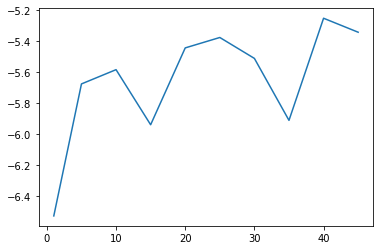

In [17]:
import matplotlib.pyplot as plt
plt.plot(passes,coherences)
plt.show()

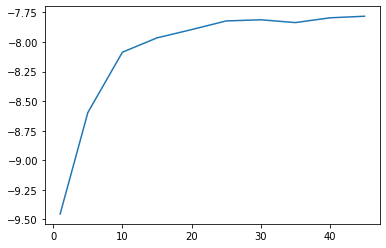

In [18]:
plt.plot(passes,perplexities)
plt.show()  

In [19]:
# 30ÏúºÎ°ú ÌÉùÌïòÍ∏∞
# coherenceÎäî shvdmf tnfhr Ï¢ãÏùåÏùå
# ÏµúÏ†ÅÏùò topic Í∞úÏàòÎäî?
coherencesT=[]
perplexitiesT=[]
numtopic=[]
# warnings.filterwarnings('ignore')

for i in range(10):
    if i==0:
        ntopics = 2
    else:
        ntopics = 20*i
    nwords = 100
    numtopic.append(ntopics)
    tic = time.time()
    lda4 = LdaModel(corpus, id2word=dictionary, num_topics=ntopics, iterations=400, passes=30)
    print('ntopics',ntopics,time.time() - tic)

    cm = CoherenceModel(model=lda4, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    print("Cpherence",coherence)
    coherencesT.append(coherence)
    print('Perplexity: ', lda4.log_perplexity(corpus),'\n\n')
    perplexitiesT.append(lda4.log_perplexity(corpus))

ntopics 2 10.685884714126587
Cpherence -4.946053362399412
Perplexity:  -6.7689540969960005 


ntopics 20 7.483750581741333
Cpherence -5.374422626662254
Perplexity:  -6.948432235220487 


ntopics 40 9.149549722671509
Cpherence -5.062799234964634
Perplexity:  -7.173628922992111 


ntopics 60 8.396946430206299
Cpherence -5.035108603524796
Perplexity:  -7.357860454555911 


ntopics 80 12.744861602783203
Cpherence -5.050763274686161
Perplexity:  -7.4977444023354645 




/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


ntopics 100 12.762553453445435
Cpherence -5.4066385987007815
Perplexity:  -7.580112394573116 


ntopics 120 10.290688514709473
Cpherence -5.15037977999455
Perplexity:  -7.612448376535339 


ntopics 140 15.569634199142456
Cpherence -5.439239199859311
Perplexity:  -7.631696642658182 


ntopics 160 18.20804214477539
Cpherence -5.4829871178215885
Perplexity:  -7.723041229216186 


ntopics 180 18.703031539916992
Cpherence -5.320141578898975
Perplexity:  -7.736060502628268 




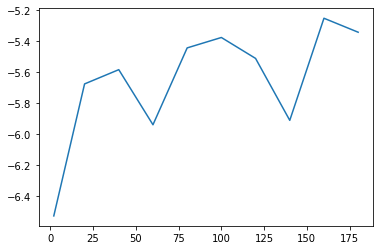

In [20]:
# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
import matplotlib.pyplot as plt
plt.plot(numtopic,coherences)
plt.show()

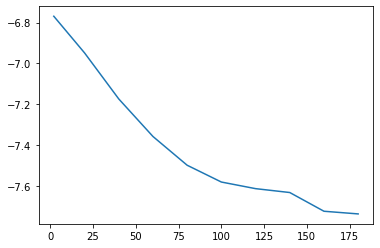

In [21]:
import matplotlib.pyplot as plt
plt.plot(numtopic,perplexitiesT)
plt.show()

In [ ]:
# Ïù¥Ï§ë forÎ¨∏
ncoherences=[]
nperplexities=[]
npasses=[]
# warnings.filterwarnings('ignore')
# passes tuning
for i in range(10):
  for j in range(10):
    if i==0:
        ntopics = 2
    else:
        ntopics = 20*i
    if i==0:
        p=1
    else:
        p=i*5
    nwords = 1000
    passes.append(p)
    tic = time.time()
    lda4 = LdaModel(corpus, id2word=dictionary, num_topics=ntopics, iterations=400, passes=p)
    print('epoch',p,time.time() - tic)

    cm = CoherenceModel(model=lda4, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    print("Coherence",coherence)
    coherences.append(coherence)
    print('Perplexity: ', lda4.log_perplexity(corpus),'\n\n')
    perplexities.append(lda4.log_perplexity(corpus))

In [ ]:
# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
import matplotlib.pyplot as plt
plt.plot(numtopic,ncoherences)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(numtopic,nperplexitiesT)
plt.show()

In [37]:
# ÏµúÏ¢Ö ÌÜ†ÌîΩ ÎÇ¥Ïö© Î≥¥Í∏∞
# topic 50Í∞ú!!
import gensim
NUM_TOPICS = 50 #20Í∞úÏùò ÌÜ†ÌîΩ, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=30)
# topicÏ§ë ÏÉÅÏúÑ 10Í∞ú Îã®Ïñ¥ ÎΩëÏïÑÎÇ¥Í∏∞Í∏∞
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

Ïä§Ìä∏Î¶¨Î∞ç Ï∂úÎ†• ÎÇ¥Ïö©Ïù¥ Í∏∏Ïñ¥ÏÑú ÎßàÏßÄÎßâ 5000Ï§ÑÏù¥ ÏÇ≠Ï†úÎêòÏóàÏäµÎãàÎã§.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum built

(49, '0.039*"Î∞úÏÇ¨" + 0.036*"ÏúÑÏÑ±" + 0.036*"ÎàÑÎ¶¨" + 0.033*"Ïö∞Ï£º" + 0.033*"Î∞úÏÇ¨Ï≤¥" + 0.033*"ÏóîÏßÑ" + 0.030*"ÎÇòÎ°ú" + 0.030*"Í∂§ÎèÑ" + 0.027*"ÎπÑÌñâ" + 0.026*"ÏÑºÌÑ∞"')
(11, '0.022*"ÏÑúÎπÑÏä§" + 0.017*"ÎØ∏Íµ≠" + 0.017*"Ï∂úÏãú" + 0.015*"Í∏∞Í∏∞" + 0.013*"Ïã§ÏãúÍ∞Ñ" + 0.011*"ÌåêÎß§" + 0.011*"ÏòàÏ†ï" + 0.011*"ÌòÑÏßÄ" + 0.011*"ÏßÄÏÜç" + 0.011*"Ï†ëÏÜç"')
(14, '0.095*"ÏÑ§ÌïòÎäî" + 0.076*"Í∞ïÎÇ®" + 0.048*"ÏÇ¨Í∞Ä" + 0.048*"Í∏∞ÎåÄÌïúÎã§" + 0.038*"Ìï¥Í≤∞" + 0.030*"ÏÇ¨Ïö©" + 0.029*"ÏûàÏúºÎ©∞" + 0.029*"Î≥∏Î∂ÄÏû•" + 0.028*"Í≥ÑÍ∏∞" + 0.018*"Î≥∏Í≤©"')
(8, '0.023*"ai" + 0.015*"Í∏∞Î∞ò" + 0.015*"Î∂ÑÏÑù" + 0.015*"Îã§ÏñëÌïú" + 0.015*"ÌäπÌûà" + 0.008*"Í¥ÄÏã¨" + 0.008*"Í∏àÏúµ" + 0.008*"ÌòëÏïΩ" + 0.008*"ÏÑúÎπÑÏä§" + 0.008*"ÏóÖÎ¨¥"')
(6, '0.067*"Í±∞ÎûòÏÜå" + 0.043*"ÏûàÎã§Îäî" + 0.041*"ÏãúÏÑ∏" + 0.036*"ÎπóÏç∏" + 0.032*"Î∂ÑÏÑù" + 0.029*"ÎèåÌåå" + 0.028*"Ìà¨ÏûêÏûê" + 0.028*"ÎÇòÏò®Îã§" + 0.022*"ÌïúÌôî" + 0.022*"ÏßÑÏûÖ"')
(37, '0.023*"Î∂àÌé∏" + 0.021*"Í≤™ÏóàÎã§" + 0.018*"ÎåÄÍ∑úÎ™®" + 0.017*"ÌÜµÏã†" + 0.01

In [41]:
! pip install pyLDAvis

In [44]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(ldamodel, corpus, dictionary)
lda_viz

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [45]:
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
17     0.113631  0.286607       1        1  5.432780
41    -0.055450  0.271661       2        1  5.209350
19    -0.085319  0.124102       3        1  4.194243
21     0.139430  0.119825       4        1  4.130576
4      0.083664 -0.053139       5        1  3.299754
11     0.065376 -0.128736       6        1  3.149548
37    -0.060780 -0.004686       7        1  3.065900
33    -0.114380 -0.041434       8        1  2.850523
25     0.137763  0.035182       9        1  2.809025
49    -0.085843  0.107161      10        1  2.751478
12    -0.012837 -0.045257      11        1  2.717936
27     0.101661 -0.071402      12        1  2.682380
7      0.167977 -0.008999      13        1  2.548576
24    -0.006474 -0.048145      14        1  2.536095
34     0.063263 -0.050858      15        1  2.314139
43    -0.185198  0.024314      16        1  2.308331
3      0.051766 -0.006036      17        1  2.305706
29     0.076024 -0.079032      18        1  2.222529
16     0.012489 -0.026978      19        1  2.091988
45     0.062761 -0.044919      20        1  2.089705
31     0.175379  0.058811      21        1  2.078196
48    -0.001817 -0.012961      22        1  1.925931
42    -0.067807 -0.051265      23        1  1.832407
38     0.029708 -0.013164      24        1  1.716373
1     -0.034011 -0.005987      25        1  1.688509
44    -0.133974 -0.057609      26        1  1.685931
30     0.084328 -0.026493      27        1  1.607258
40    -0.044684 -0.017367      28        1  1.572228
20     0.002804 -0.041183      29        1  1.488300
23     0.002973  0.050221      30        1  1.481140
32    -0.008106 -0.048395      31        1  1.464405
5     -0.000526 -0.015716      32        1  1.389308
28     0.038744 -0.091652      33        1  1.387161
0      0.059074 -0.023042      34        1  1.373275
46     0.049315  0.031488      35        1  1.372879
13     0.011567 -0.080465      36        1  1.364331
39    -0.020838 -0.035639      37        1  1.352996
18    -0.003597 -0.095922      38        1  1.292301
26     0.007187 -0.032145      39        1  1.267575
9     -0.024087 -0.043033      40        1  1.239028
22    -0.173393  0.026196      41        1  1.113418
36    -0.107173 -0.020322      42        1  1.073543
6     -0.159144 -0.011677      43        1  1.057738
8      0.112280  0.058297      44        1  1.011072
35    -0.052244  0.052632      45        1  0.906863
47    -0.038568  0.010170      46        1  0.828727
2     -0.047119 -0.089740      47        1  0.810088
14    -0.073761  0.077581      48        1  0.773531
15    -0.092640  0.069835      49        1  0.635771
10     0.040609  0.019316      50        1  0.499152, topic_info=     Term       Freq      Total Category  logprob  loglift
720    kt  57.000000  57.000000  Default  30.0000  30.0000
479    lg  51.000000  51.000000  Default  29.0000  29.0000
51     ÏÑºÌÑ∞  38.000000  38.000000  Default  28.0000  28.0000
542  Ïú†ÌîåÎü¨Ïä§  35.000000  35.000000  Default  27.0000  27.0000
261    Í∏∞Î∞ò  37.000000  37.000000  Default  26.0000  26.0000
..    ...        ...        ...      ...      ...      ...
333   Ïò®ÎùºÏù∏   0.798014  15.526952  Topic50  -4.2713   2.3318
559    Ïò§Îäî   0.798014  22.197226  Topic50  -4.2713   1.9744
572    Í≤ΩÏüÅ   0.798014  17.198998  Topic50  -4.2713   2.2295
582    ÏòàÏ†ï   0.798014  19.231272  Topic50  -4.2713   2.1178
735    Í∞úÏµú   0.798014  15.562011  Topic50  -4.2713   2.3296

[2302 rows x 6 columns], token_table=      Topic      Freq Term
term                      
288       4  0.309050   ai
288       5  0.051508   ai
288       6  0.025754   ai
288       9  0.103017   ai
288      13  0.025754   ai
...     ...       ...  ...
244      23  0.404327   Ìù•Ìñâ
853       4  0.657727   Ìù¨Îßù
853      14  0.164432   Ìù¨Îßù
853      15  0.082216   Ìù¨Îßù
853      27  0.082216   Ìù¨Îßù

[6044 rows x 3 columns], R=30, lambda_step=0.